#Recommendation engine
Recommendation engine can be classified in 2 broad categories:
- Collaborative
- Content based


*Change* *runtime*

Additional connection options > Change runtime type > T4 GPU > Save

##Importing necessary Libraries

In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

##Connecting Colab to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Fetching dataset from Drive

In [3]:
df=pd.read_csv('/content/drive/MyDrive/combined_data_1.txt.zip',header=None,names=['cust_id','rating'],usecols=[0,1])
df.head()

,cust_id,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


##Studying dataset

In [4]:
df.dtypes

cust_id     object
rating     float64
dtype: object

In [5]:
df['rating']=df['rating'].astype(float)

In [6]:
df.dtypes

cust_id     object
rating     float64
dtype: object

In [7]:
df.shape

(24058263, 2)

Getting customer count with NaN values

In [8]:
movie_count=df.isnull().sum()
movie_count

cust_id       0
rating     4499
dtype: int64

Getting customer count of unique customers from dataset

In [9]:
customer_count=df['cust_id'].nunique()
customer_count

475257

Customer count of those having NaN values

In [10]:
customer_count=df['cust_id'].nunique()-movie_count
customer_count

cust_id    475257
rating     470758
dtype: int64

Getting total number of ratings given by customers

In [11]:
rating_count=df['cust_id'].count()-movie_count
rating_count

cust_id    24058263
rating     24053764
dtype: int64

Finding out how many people have rated the movies from 1 to 5 star

In [12]:
stars=df.groupby('rating')['rating'].agg(['count'])
stars

,count
rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


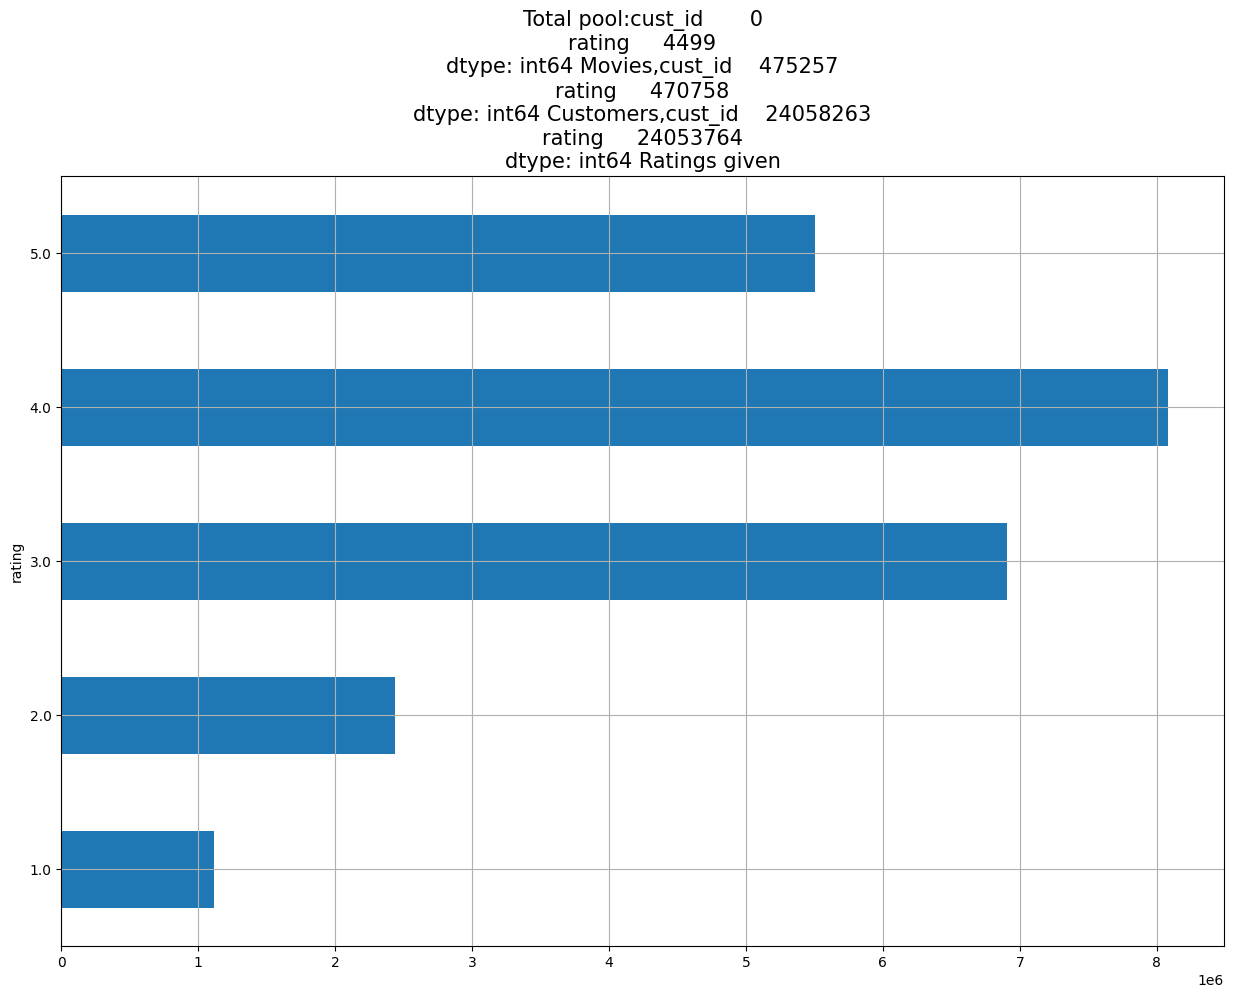

In [13]:
ax=stars.plot(kind='barh',legend=False,figsize=(15,10))
plt.title(f'Total pool:{movie_count} Movies,{customer_count} Customers,{rating_count} Ratings given',fontsize=15)
plt.grid(True)

##Manipulating Dataset

Adding another column that will store movie ID

Initially getting total count of null values present in rating column

In [14]:
df_nan=pd.DataFrame(pd.isnull(df.rating))
df_nan

,rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [15]:
df_nan=df_nan[df_nan['rating']==True]
df_nan

,rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [16]:
df_nan.shape

(4499, 1)

Reset the index as to make it the column header

In [17]:
df_nan=df_nan.reset_index()
df_nan

,index,rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


Creating a numpy array containing movie IDs according to the 'ratings' dataset

In [18]:
movie_np=[]
movie_id=1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp=np.full((1,i-j-1),movie_id)
    movie_np=np.append(movie_np,temp)
    movie_id+=1

In [19]:
df_nan.iloc[-1,0]

24057834

In [20]:
len(df)

24058263

Accounting for last record and corresponding length

In [21]:
last_record=np.full((1,len(df)-df_nan.iloc[-1,0]-1),movie_id)
movie_np=np.append(movie_np,last_record)

print('Movie numpy:',movie_np)
print('Length:',len(movie_np))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [22]:
len(df)

24058263

In [23]:
df.head()

,cust_id,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [24]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [25]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [26]:
len(df)

24058263

In [27]:
x=zip(df_nan['index'][1:],df_nan['index'][:-1])
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [28]:
df=df[pd.notnull(df['rating'])]
df['movie_id']=movie_np.astype(int)
df['cust_id']=df['cust_id'].astype(int)
print('Now the dataset looks like:')
df.head()

Now the dataset looks like:


,cust_id,rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


Removing all users that have rated less number of movies and also those movies that have been rated less number of times

In [29]:
f=['count','mean']
movie_summary=df.groupby('movie_id').agg(f)
movie_summary

cust_id               rating          
           count          mean  count      mean
movie_id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [30]:
movie_summary=df.groupby('movie_id')['rating'].agg(f)
movie_summary

,count,mean
movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [31]:
movie_summary['count'].quantile(0.7)

1798.6

Creating benchmark to compare

In [32]:
movie_benchmark=round(movie_summary['count'].quantile(0.7))
movie_benchmark

1799

In [33]:
movie_summary['count']

movie_id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

Dropping those movies which have values less than set benchmark

In [34]:
drop_movie_list=movie_summary[movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='movie_id', length=3149)

Removing all inactive users

In [35]:
cust_summary=df.groupby('cust_id')['rating'].agg(f)
cust_summary

,count,mean
cust_id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


Creating benchmark

In [36]:
cust_benchmark=round(cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

Dropping values less than set benchmark

In [37]:
drop_cust_list=cust_summary[cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='cust_id', length=327300)

Finally removing all customers and movies that are below both benchmarks

In [38]:
print('Original dataframe has:',df.shape,'shape')

Original dataframe has: (24053764, 3) shape


In [39]:
df=df[~df['movie_id'].isin(drop_movie_list)]
df=df[~df['cust_id'].isin(drop_cust_list)]
print('After trimming, the shape is: {}'.format(df.shape))

After trimming, the shape is: (17337458, 3)


##Preparing dataset for SVD

In [47]:
df_title=pd.read_csv('movie_titles (1).csv',encoding='ISO-8859-1',header=None,usecols=[0,1,2],names=['movie_id','year','name'])
df_title.set_index('movie_id',inplace=True)
df_title.head()

,year,name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [43]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163498 sha256=f11550e311003127a6370b9d4ff74a7b00859a5fc08a50da70f13e1a0541dc0f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


##Model Building

In [45]:
import math
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [46]:
reader=Reader()

Selecting only top 100k rows for quick runtime

In [48]:
data=Dataset.load_from_df(df[['cust_id','movie_id','rating']][:100000],reader)

In [50]:
svd=SVD()
cross_validate(svd,data,measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9973  1.0016  0.9956  0.9946  1.0017  0.9982  0.0030  
MAE (testset)     0.8089  0.8126  0.8085  0.8107  0.7957  0.8073  0.0059  
Fit time          1.41    2.29    2.38    1.53    1.50    1.82    0.42    
Test time         0.10    0.15    0.30    0.24    0.10    0.18    0.08    


{'test_rmse': array([0.99733527, 1.00156512, 0.99558865, 0.99456335, 1.00169848]),
 'test_mae': array([0.80888792, 0.81255388, 0.80852197, 0.81070406, 0.7957377 ]),
 'fit_time': (1.4125943183898926,
  2.292105197906494,
  2.3770217895507812,
  1.5334084033966064,
  1.5021977424621582),
 'test_time': (0.10341286659240723,
  0.14589190483093262,
  0.30072712898254395,
  0.24436497688293457,
  0.10082173347473145)}

In [51]:
df.head()

,cust_id,rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


Considering only first user 712664 and recommending some movies based on past data

In [52]:
data_712664=df[(df['cust_id']==712664)&(df['rating']==5)]
data_712664

,cust_id,rating,movie_id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [53]:
df_title.head()

,year,name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


##Building recommendation algorithm
Making a copy of movie_titles dataset so changes can be made in the copy without affecting the original dataset

In [54]:
user_712664=df_title.copy()
user_712664

,year,name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [55]:
user_712664=user_712664.reset_index()
user_712664

,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [57]:
user_712664=user_712664[~user_712664['movie_id'].isin(drop_movie_list)]
user_712664

,movie_id,year,name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


Using SVD predict function to generate an estimate score which gives an idea on likeliness of a movie to be predicted

In [58]:
user_712664['estimate_score']=user_712664['movie_id'].apply(lambda x:svd.predict(712664,x).est)
user_712664=user_712664.drop('movie_id',axis=1)

In [59]:
user_712664=user_712664.sort_values('estimate_score')
print(user_712664)

         year                        name  estimate_score
25     2004.0             Never Die Alone        2.993844
16     2005.0                   7 Seconds        2.999500
7      2004.0  What the #$*! Do We Know!?        3.265924
15     1996.0                   Screamers        3.460750
10459  1988.0         Red Dwarf: Series 1        3.624521
...       ...                         ...             ...
8027   1993.0            White Lotus Cult        3.624521
27     2002.0             Lilo and Stitch        3.750409
2      1997.0                   Character        3.761095
29     2003.0      Something's Gotta Give        3.841492
17     1994.0            Immortal Beloved        3.845520

[14621 rows x 3 columns]


In [61]:
user_712664=user_712664.sort_values('estimate_score',ascending=False)
print(user_712664.head(10))

      year                     name  estimate_score
17  1994.0         Immortal Beloved        3.845520
29  2003.0   Something's Gotta Give        3.841492
2   1997.0                Character        3.761095
27  2002.0          Lilo and Stitch        3.750409
51  2002.0  The Weather Underground        3.624521
67  2004.0              Invader Zim        3.624521
57  1996.0              Dragonheart        3.624521
56  1995.0              Richard III        3.624521
55  2004.0                Carandiru        3.624521
54  1995.0                     Jade        3.624521


Based on estimate score, above movies can be recommended to the concerned user 712664